In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

### Centre of mass' position and velocity calculation function

In [3]:
def COM(masses,pos,N,M):
    coms = np.zeros((1,3,total_steps))
    for i in range(N):
        coms[0,:,:] += masses[i]*pos[i,:,:]
    coms[0,:,:] /= M
    
    return coms

In [4]:
G = 7.46496*6.674e-11 # in units where length in kms and time in days, mass in kgs

In [5]:
N = 9 # no. of bodies
t0 = 0.0
tf = 10e03 # days
dt = 1 
total_steps = int((tf-t0)/dt)

### numpy matrices initialization

In [6]:
times = np.arange(t0,tf,dt)
#print(times)
masses = np.zeros(N)
pos = np.zeros((N,3,total_steps))
vels = np.zeros((N,3,total_steps))

vels_half = np.zeros((N,3,total_steps-1))
acc = np.zeros((N,3,total_steps))

bodies = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'saturn', 'Uranus', 'Neptune']

### INITIAL CONDITIONS and DATA

In [7]:
masses = [1.989e30, 0.330e24 ,4.87e24, 5.97e24, 0.642e24, 1898e24, 568e24, 86.8e24, 102e24] 
#Sun -> MERCURY  	 VENUS  	 EARTH  	 MARS   	 JUPITER  	 SATURN  	 URANUS  	 NEPTUNE 

M = sum(masses)
print(M)

1.991666612e+30


In [8]:
## Data from google sheets ##

pos[:,:,0] = [[-9.95114977680456E+05, 8.98124266329700E+05, 1.58229931598423E+04],
              [3.44615441391852E+07,-5.26557638532672E+07,-7.61286267143204E+06],
              [-6.77779938168010E+07,-8.43597394901336E+07,2.69958030976802E+06],
              [-2.77904903569589E+07,1.45531279592339E+08,8.81421672415733E+03],
              [9.18866271313871E+07,2.06696061841096E+08,2.05002398237805E+06],
              [4.54003785963550E+08,-6.10682430690077E+08,-7.62390632497143E+06],
              [8.20351176602562E+08,-1.24706574543561E+09,-1.09761808144217E+07],
              [2.29533745289993E+09,1.86512722528805E+09,-2.28093347838273E+07],
              [4.40623682311692E+09,-7.81771702943420E+08,-8.54471655924357E+07]]

vels[:,:,0] = [[-1.02322911909127E+03, -8.62040073870347E+02, 3.22970824014921E+01],
             [2.66853110932131E+06, 2.52863729277372E+06, -3.81479438257272E+04],
             [2.35980800402788E+06, -1.88090247751281E+06,-1.62002003392357E+05],
             [-2.57276934940778E+06, -4.78827962928565E+05, -7.40263589142244E+00],
             [-1.82981597359163E+06, 1.03827381243802E+06, 6.66708767010003E+04],
             [8.91855173066660E+05, 7.26974788682208E+05, -2.29741878167567E+04],
             [6.50758615732736E+05, 4.56696587751460E+05, -3.39034493618639E+04],
             [-3.75348244065152E+05, 4.29216592436392E+05, 6.45229544743987E+03],
             [7.88686712937182E+04, 4.65184720928017E+05, -1.13436707185877E+04]]

### Acceleration function

In [22]:
def acceleration(pos,t):
    
    for i in range(N):
        for j in range(N):
            if i==j: ## skip to next body because a body cannot exert force on itself
                continue
            else:
                x = (pos[i,0] - pos[j,0])
                y = (pos[i,1] - pos[j,1]) 
                z = (pos[i,2] - pos[j,2])
                dist = [x,y,z]
                mag = (x**2 + y**2 + z**2)**(1.5)
                acc[i,0,t] += (-masses[j]*dist[0])/mag ## newtonian acceleration formula for gravity 
                acc[i,1,t] += (-masses[j]*dist[1])/mag 
                acc[i,2,t] += (-masses[j]*dist[2])/mag
                
        acc[i,:,t] *= G

    return acc[:,:,t] ## returns the x,y,z components of acceleration for all bodies
len(pos[0])

3

### To kickstart the algorithm

In [10]:
acc[:,:,0] = acceleration(pos[:,:,0],0) # at t=0
print(acc[0,0,0], acc[0,1,0], acc[0,2,0]) ## x, y, z components of acceleration at t=0

0.9189126287966848 -1.463069933456196 -0.01679096637737535


### Algorithm loop

In [11]:

for t in range(1,total_steps):
    
    vels_half[:,0,t-1] = vels[:,0,t-1] + dt*acc[:,0,t-1]/2 # v_x
    vels_half[:,1,t-1] = vels[:,1,t-1] + dt*acc[:,1,t-1]/2 # v_y
    vels_half[:,2,t-1] = vels[:,2,t-1] + dt*acc[:,2,t-1]/2 # v_z
    
    pos[:,0,t] = pos[:,0,t-1] + dt*vels_half[:,0,t-1] #x
    pos[:,1,t] = pos[:,1,t-1] + dt*vels_half[:,1,t-1] #y
    pos[:,2,t] = pos[:,2,t-1] + dt*vels_half[:,2,t-1] #x
    
    acc_temp[:,:,0] = acceleration(pos[:,:,t],t) ## stores x,y,z acc of all bodies at time t
    
    vels[:,0,t] = vels_half[:,0,t-1] + dt*acc_temp[:,0,0]/2 #a_x
    vels[:,1,t] = vels_half[:,1,t-1] + dt*acc_temp[:,1,0]/2 #a_y
    vels[:,2,t] = vels_half[:,2,t-1] + dt*acc_temp[:,2,0]/2 #a_z

### COM

In [12]:
com_pos = COM(masses,pos,N,M)
print("x = ",com_pos[0,0,0],"y = ",com_pos[0,1,0],"z = ",com_pos[0,2,0])

com_vels = COM(masses,vels,N,M)
print("Vx = ",com_vels[0,0,0],"Vy = ",com_vels[0,1,0],"Vz = ",com_vels[0,2,0])

x =  -1696.676632770003 y =  846.6329629038863 z =  42.09077215374682
Vx =  -0.7670075829115973 Vy =  -0.6068436911133982 Vz =  0.010520809739419138


### 3D Plot

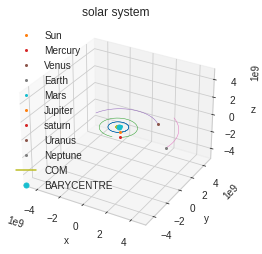

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

## planet orbits ##
for i in range(N):
    ax.plot(pos[i,0,:],pos[i,1,:],pos[i,2,:],linewidth = 0.5)
    ax.plot([pos[i,0,0]],[pos[i,1,0]],[pos[i,2,0]],'o', ms=2,label = bodies[i])

## COM, barycentre ##
ax.plot(com_pos[0,0,:],com_pos[0,1,:],com_pos[0,2,:],label = 'COM')
ax.plot([0],[0],[0],'o',ms = 5,label = 'BARYCENTRE')
ax.set(title = 'solar system', xlabel = 'x',ylabel = 'y',zlabel = 'z')

limx = -5e09
limy = 5e09

ax.set_xlim(limx,limy)
ax.set_zlim(limx,limy)
ax.set_ylim(limx,limy)
plt.legend()

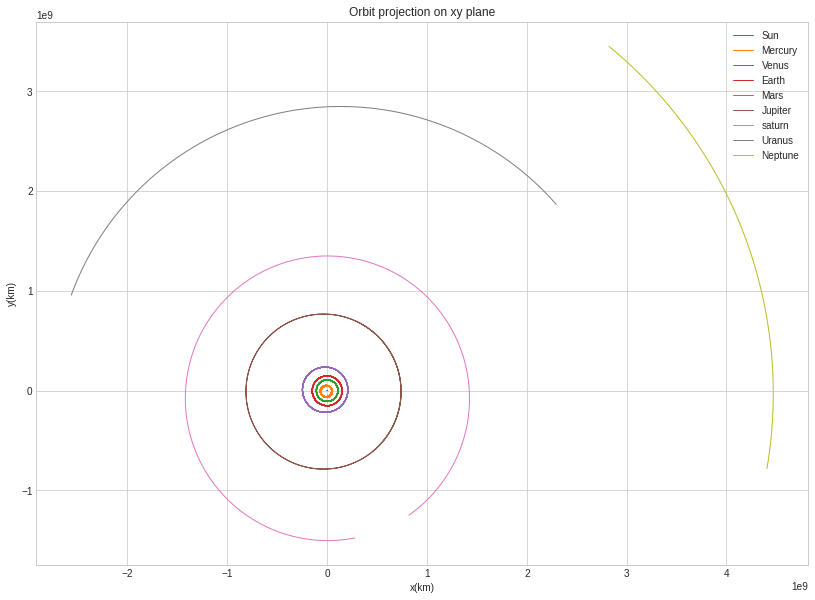

In [14]:

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot()
 
for i in range(N):
    ax.plot(pos[i,0,:],pos[i,1,:],linewidth = 1,label = bodies[i])

ax.set(title = 'Orbit projection on xy plane', xlabel = 'x(km)',ylabel = 'y(km)')
ax.set_aspect('equal')
plt.legend()
#plt.savefig('beautiful_solar_system.png', dpi = 1000)


### Energy

In [15]:
KEs = np.zeros((total_steps))
PEs = np.zeros((total_steps))
Es = np.zeros((total_steps))
fracEs = np.zeros((total_steps)) # fractional energies: (E at t)/(E at t=0)

for i in range(N):
    KEs[:] += masses[i]*0.5*(vels[i,0,:]**2+vels[i,1,:]**2+vels[i,2,:]**2)

for i in range(N):
    for j in range(i+1,N):
        dist = np.zeros((total_steps))
        dist[:] = ((pos[i,0,:]-pos[j,0,:])**2 +  (pos[i,1,:]-pos[j,1,:])**2 + (pos[i,2,:]-pos[j,2,:])**2)**(0.5)
        PEs[:] -= (G*masses[i]*masses[j])/dist[:]
        
Es = KEs+PEs
fracEs[:] = Es[:]/Es[0]

print(fracEs[0],fracEs[-1])

1.0 0.999999904853535


### Energy plot

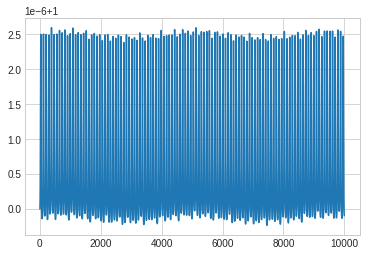

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(times,fracEs)

### Visualizing orbits as seen from Earth